In [3]:
import numpy as np
import cv2
import numpy as np
#from google.colab.patches import cv2.imshow
import matplotlib.pyplot as plt
from tqdm import tqdm


In [103]:
def canny(image):
  #covert to greyscale
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  #cv2.imshow(gray)

  #gausian noise
  blur = cv2.GaussianBlur(gray, (5,5), 100) #5by5 kernel
  #cv2.imshow(blur)

  # Apply Canny method to detect edges
  canny = cv2.Canny(blur, 15, 50) #low, high threshholds
  #plt.imshow(canny)
  
  return canny




In [107]:
def region_of_interest(image):
  height = image.shape[0]
  
  # polygons = np.array([
  #                      [(50, height), (550, height), (325, 250)]
  # ])

  polygons = np.array([
                       [(100, height), (550, height), (325, 175)]
  ])


  
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, polygons, 255)
  return mask

In [9]:
def display_lines(image, lines):
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1, y1, x2, y2 = line.reshape(4)
      cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 3)
  return line_image

In [99]:
def process_frame(image):
  edges = canny(image)

  #mask
  mask = region_of_interest(edges)
  #cv2.imshow(mask)
  

  #appying mask with bitwise &
  masked = cv2.bitwise_and(edges, mask)
  #cv2.imshow(masked)

  lines = cv2.HoughLinesP(masked, 2,  np.pi/180, 50, np.array([]), minLineLength=25, 
                        maxLineGap=5)
  #2 bins with 1 degree precision

  line_image = display_lines(image, lines)
  #cv2.imshow(line_image)

  #combo image
  combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)
  #cv2.imshow(combo_image)

  return combo_image

In [91]:
#vcap = cv2.VideoCapture("https://drive.google.com/u/0/uc?id=1kUiEA4Sz3C8smefQhZyFpAnM8KlS5Q58&export=download")
vcap = cv2.VideoCapture("inputs/roadtrip5.mov")

In [92]:


fourcc = cv2.VideoWriter_fourcc("M", "J", "P", "G")


frames = []
while (vcap.isOpened()):
  _, frame = vcap.read()
  if frame is None:
    break

  frames.append(frame)
  #print(frame)
  #cv2.imshow(process_frame(frame))
  #writer.write((frame))

 

vcap.release()
#writer.release() 


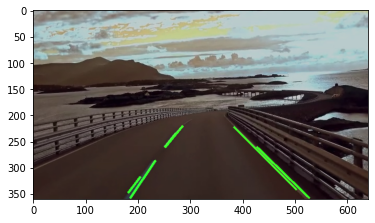

In [108]:
edges = canny(frames[1000])
mask = region_of_interest(edges)

masked = cv2.bitwise_and(edges, mask)

plt.imshow(process_frame(frames[1100]))
#plt.imshow(masked)

In [109]:
writer = cv2.VideoWriter("out.avi", fourcc, 30, (640, 360))
for frame in tqdm(frames):
  writer.write(process_frame(frame))
writer.release()

100%|██████████| 2720/2720 [00:09<00:00, 272.60it/s]


In [16]:


# def make_coordinates(image, line_parameters):
#   slope, intercept = line_parameters
#   y1 = image.shape[0]
#   y2 = int(y1*(3/5))
#   x1 = int((y1 - intercept)/slope)
#   x2 = int((y2 - intercept)/slope)

#   return np.array([x1, y1, x2, y2])

# def average_slope_intercept(image, lines):
#   left_fit = []
#   right_fit = []

#   for line in lines:
#     x1, y1, x2, y2 = line.reshape(4)
#     parameters = np.polyfit((x1, y1), (x2, y2), 1)  #fit a first degree polynomial to our x and y points and return vector of coeffiecients that descibe the slope and intercept
#     slope = parameters[0]
#     intercept = parameters[1]
#     if slope < 0:
#       left_fit.append((slope, intercept))
#     else:
#       right_fit.append((slope, intercept))


#   left_fit_average = np.average(left_fit, axis=0)
#   right_fit_average = np.average(right_fit, axis=0)

#   left_line = make_coordinates(image, left_fit_average)
#   right_line = make_coordinates(image, right_fit_average)

#   return np.array([right_line, left_line])




In [17]:
# averaged_lines = average_slope_intercept(image, lines)
# line_image2 = display_lines(image, averaged_lines)
# cv2.imshow(line_image2)
